# Read the data from the CSV file and evaluate the MAPE (Mean Absolute Percentage Error)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("prefill_decode_accuracy.csv")
df

,prompt_size,kavier_prefill,reality_prefill,kavier_decode,reality_decode
0,64,0.052,0.054,2.383,2.316
1,128,0.079,0.072,4.739,4.526
2,256,0.134,0.123,9.183,9.052
3,512,0.243,0.213,18.205,18.120
4,1024,0.461,0.436,34.205,36.332
5,2048,0.898,0.819,81.716,73.062
6,4096,1.772,1.749,138.205,147.257
7,8192,3.520,3.860,292.694,299.566
8,16384,7.015,7.347,619.583,617.688


In [3]:
kavier_prefill = df["kavier_prefill"]
reality_prefill = df["reality_prefill"]

kavier_decode = df["kavier_decode"]
reality_decode = df["reality_decode"]

In [4]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [5]:
print(f"Kavier Prefill MAPE: {calculate_mape(reality_prefill, kavier_prefill):.2f}%")
print(f"Kavier Decode MAPE: {calculate_mape(reality_decode, kavier_decode):.2f}%")

Kavier Prefill MAPE: 7.39%
Kavier Decode MAPE: 4.00%


Kavier Prefill MAPE: 7.39%
Kavier Decode MAPE: 4.00%


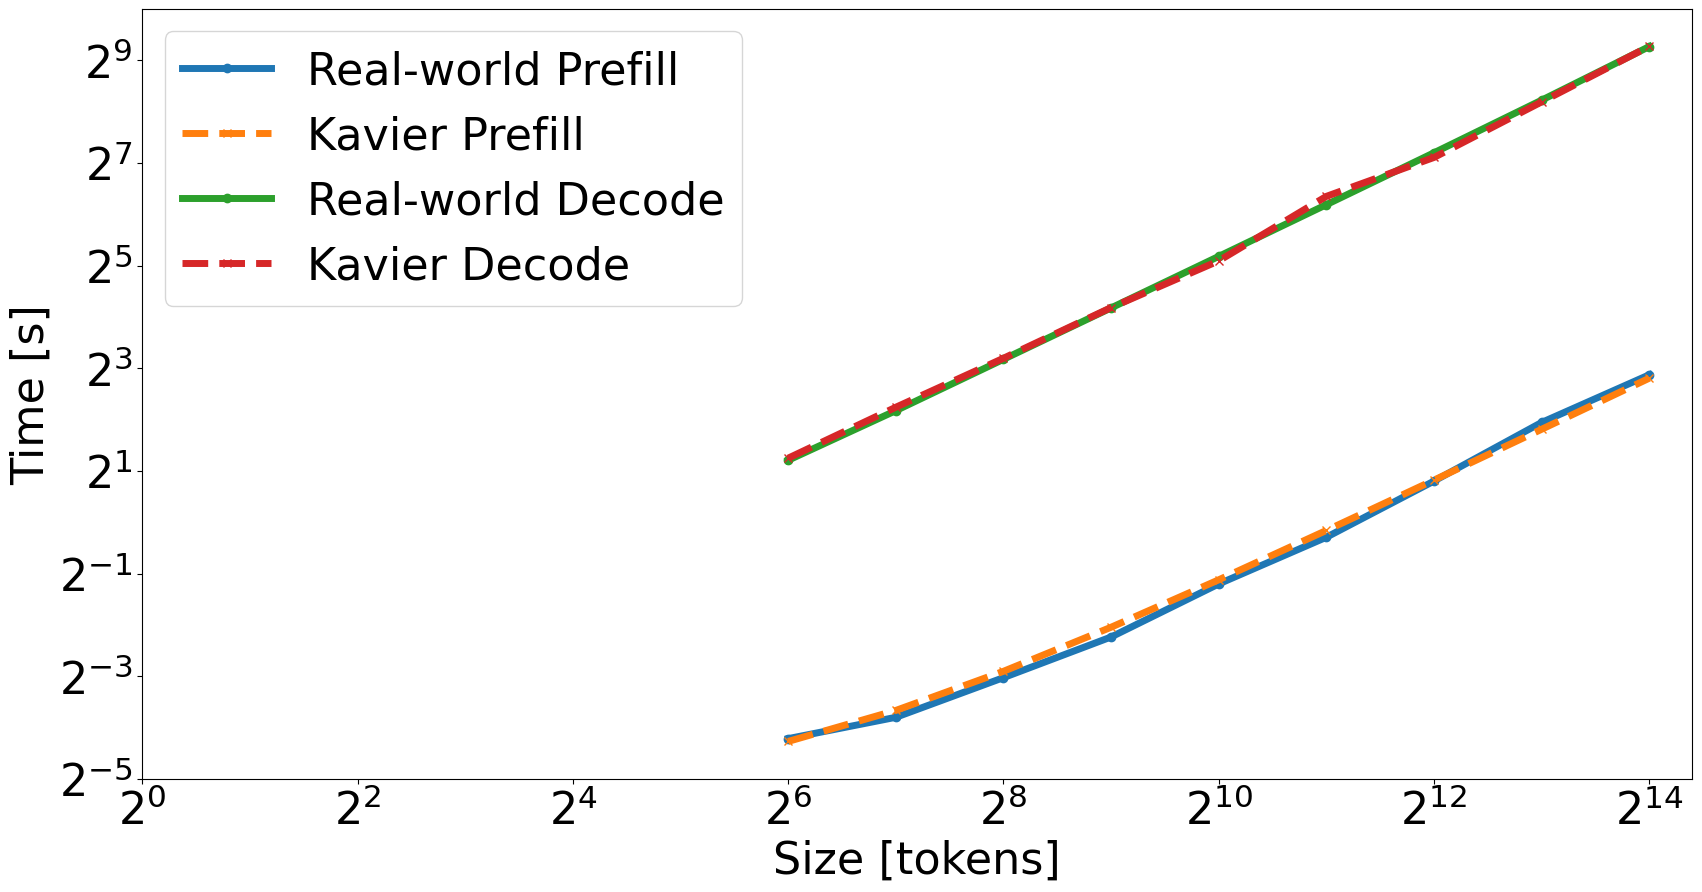

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("prefill_decode_accuracy.csv")

kavier_prefill = df['kavier_prefill']
reality_prefill = df['reality_prefill']
kavier_decode = df['kavier_decode']
reality_decode = df['reality_decode']

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Kavier Prefill MAPE: {calculate_mape(reality_prefill, kavier_prefill):.2f}%")
print(f"Kavier Decode MAPE: {calculate_mape(reality_decode, kavier_decode):.2f}%")

plt.figure(figsize=(20, 10))
plt.plot(df['prompt_size'], reality_prefill, marker='o', linestyle='-', label='Real-world Prefill')
plt.plot(df['prompt_size'], kavier_prefill, marker='x', linestyle='--', label='Kavier Prefill')
plt.plot(df['prompt_size'], reality_decode, marker='o', linestyle='-', label='Real-world Decode')
plt.plot(df['prompt_size'], kavier_decode, marker='x', linestyle='--', label='Kavier Decode')

plt.xlabel('Size [tokens]', fontsize=32)
plt.ylabel('Time [s]', fontsize=32)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.ylim(bottom=1/32, top=2**10)
plt.xlim(left=1)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

for line in plt.gca().lines:
    line.set_linewidth(5)

plt.legend(fontsize=32)
plt.savefig("figures/kavier_prefill_decode_accuracy.pdf")
plt.show()

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("prefill_decode_accuracy.csv")

rp, kp = df.reality_prefill.values, df.kavier_prefill.values
rd, kd = df.reality_decode.values,   df.kavier_decode.values

def mape(a, p):
    mask = a != 0
    return np.mean(np.abs((a[mask] - p[mask]) / a[mask])) * 100

print(f"Prefill MAPE: {mape(rp, kp):.2f}%")
print(f"Decode  MAPE: {mape(rd, kd):.2f}%")

weights = np.concatenate([rp, rd])
errors  = np.concatenate([np.abs(rp - kp), np.abs(rd - kd)])
overall = (errors * weights).sum() / weights.sum() / weights.mean() * 100
print(f"Overall weighted MAPE: {overall:.2f}%")


Prefill MAPE: 7.39%
Decode  MAPE: 4.00%
Overall weighted MAPE: 6.36%
